# Lets Grow More VIP - Feb 2022

# Intermediate Level Task - Exploratory Data Analysis on Dataset - Terrorism 

## Dataset Link - https://bit.ly/2TK5Xn5

## Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Importing the Dataset

In [2]:
# Loading the Global Terrorism Dataset
df = pd.read_csv('globalterrorismdb_0718dist.csv', engine='python')

In [3]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


## Exploring the Data

In [4]:
# Checking number of rows and columns in the data set
print('Number of rows and columns in the data set: ',df.shape)

Number of rows and columns in the data set:  (181691, 135)


In [5]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [6]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
# Keeping only Important Data Columns
data = df[[ 'iyear','country_txt', 'region_txt', 'provstate', 'city', 'crit1', 'crit2', 'crit3', 
                  'success', 'suicide', 'attacktype1_txt', 'targtype1_txt', 'natlty1_txt','gname', 'guncertain1', 
                  'claimed', 'weaptype1_txt', 'nkill','nwound', 'motive']]

In [8]:
# Renaming the Columns
data.rename(columns={'iyear':'Year', 'country_txt':'Country', 'region_txt':'Region', 'provstate':'Provstate', 'city':'City',
                     'crit1':'Crit1', 'crit2':'Crit2', 'crit3':'Crit3', 'success':'Success', 'suicide':'Suicide',
                     'attacktype1_txt':'Attacktype', 'targtype1_txt':'Targtype', 'natlty1_txt':'Natlty1', 'gname':'Gname',
                     'guncertain1':'Guncertain1', 'claimed':'Claimed',  'weaptype1_txt':'Weaptype', 'nkill':'Nkill', 
                     'nwound':'Nwound', 'motive':'Motive'}, inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 20 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Country      181691 non-null  object 
 2   Region       181691 non-null  object 
 3   Provstate    181270 non-null  object 
 4   City         181257 non-null  object 
 5   Crit1        181691 non-null  int64  
 6   Crit2        181691 non-null  int64  
 7   Crit3        181691 non-null  int64  
 8   Success      181691 non-null  int64  
 9   Suicide      181691 non-null  int64  
 10  Attacktype   181691 non-null  object 
 11  Targtype     181691 non-null  object 
 12  Natlty1      180132 non-null  object 
 13  Gname        181691 non-null  object 
 14  Guncertain1  181311 non-null  float64
 15  Claimed      115571 non-null  float64
 16  Weaptype     181691 non-null  object 
 17  Nkill        171378 non-null  float64
 18  Nwound       165380 non-

## Data Analysis

In [10]:
print('Country with the highest number of Terrorist Attacks:',data['Country'].value_counts().index[0])
print('\nRegions with the highest number of Terrorist Attacks:',data['Region'].value_counts().index[0])
print('\nMaximum number of people were killed by a single terrorist attack are',data['Nkill'].max(),'people that took place in',data.loc[data['Nkill'].idxmax()].Country)
print("\nYear with the most attacks:",data['Year'].value_counts().idxmax())
print("\nGroup with the most attacks:",data['Gname'].value_counts().index[1]) # As most attack was done by unknown we are taking the next group name
print("\nMost Attack Types:",data['Attacktype'].value_counts().idxmax())

Country with the highest number of Terrorist Attacks: Iraq

Regions with the highest number of Terrorist Attacks: Middle East & North Africa

Maximum number of people were killed by a single terrorist attack are 1570.0 people that took place in Iraq

Year with the most attacks: 2014

Group with the most attacks: Taliban

Most Attack Types: Bombing/Explosion


### Data analysis of Global Terrorism from 1970 to 2017

In [11]:
data['Year'].value_counts(dropna = False).sort_index()

1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
Name: Year, dtype: int64

## Data Visualization

### Terrorist Activities by Region in each Year through Area Plot

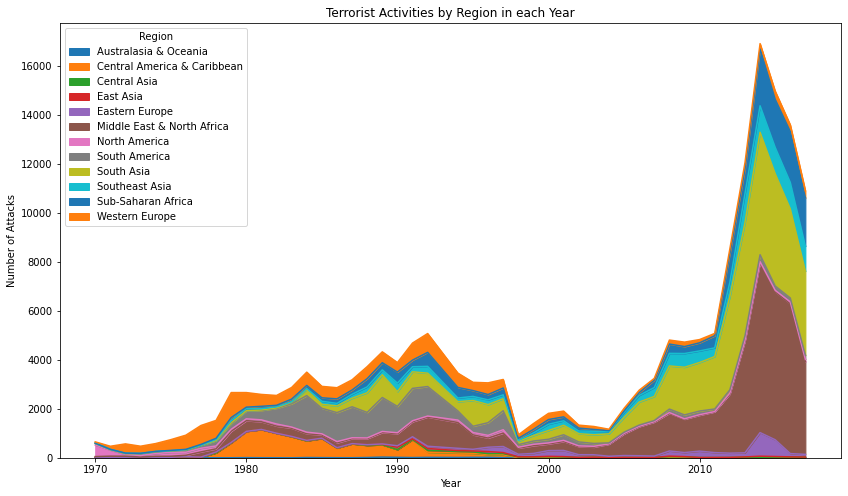

In [12]:
pd.crosstab(data.Year, data.Region).plot(kind='area',figsize=(14,8))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

### Number of attacks each year from 1970 to 2017

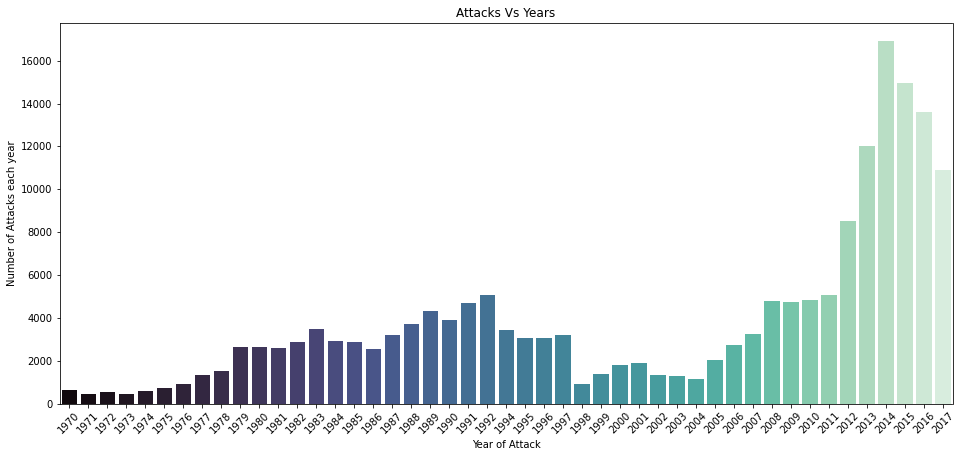

In [13]:
x_year = data['Year'].unique()
y_count_years = data['Year'].value_counts(dropna = False).sort_index()

plt.figure(figsize = (16,7))
sns.barplot(x = x_year, y = y_count_years, palette = 'mako')
plt.xticks(rotation = 45)
plt.xlabel('Year of Attack')
plt.ylabel('Number of Attacks each year')
plt.title('Attacks Vs Years')
plt.show()

In [14]:
# Taking nulldata to zero and combining kill and wound as a Damage
data['Nwound'] = data['Nwound'].fillna(0).astype(int)
data['Nkill'] = data['Nkill'].fillna(0).astype(int)
data['Damage'] = data['Nkill'] + data['Nwound']

In [15]:
data['Damage']

0         1
1         0
2         1
3         0
4         0
         ..
181686    3
181687    9
181688    0
181689    0
181690    0
Name: Damage, Length: 181691, dtype: int32

### Analysing the Type of Attack

In [16]:
print(data['Attacktype'].unique())

['Assassination' 'Hostage Taking (Kidnapping)' 'Bombing/Explosion'
 'Facility/Infrastructure Attack' 'Armed Assault' 'Hijacking' 'Unknown'
 'Unarmed Assault' 'Hostage Taking (Barricade Incident)']


In [17]:
data['Attacktype'].value_counts()

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: Attacktype, dtype: int64

In [18]:
atk_filtered =data['Attacktype'].apply(lambda x: x if x in ['Bombing/Explosion','Armed Assault','Assassination',
                                                            'Hostage Taking (Kidnapping)',
                                                            'Facility/Infrastructure Attack'] else 'Others')
attack_type = atk_filtered.value_counts().tolist()

In [19]:
atk_filtered.unique()

array(['Assassination', 'Hostage Taking (Kidnapping)',
       'Bombing/Explosion', 'Facility/Infrastructure Attack',
       'Armed Assault', 'Others'], dtype=object)

In [20]:
atk_filtered.value_counts()

Bombing/Explosion                 88255
Armed Assault                     42669
Assassination                     19312
Hostage Taking (Kidnapping)       11158
Facility/Infrastructure Attack    10356
Others                             9941
Name: Attacktype, dtype: int64

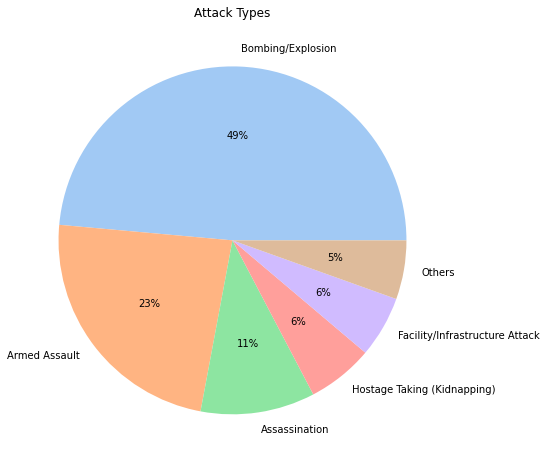

In [21]:
labels = ['Bombing/Explosion','Armed Assault','Assassination',
          'Hostage Taking (Kidnapping)','Facility/Infrastructure Attack','Others']
colors = sns.color_palette('pastel')[0:6]

#Creating pie chart
plt.figure(figsize=(16, 8))
plt.title('Attack Types')
plt.pie(attack_type, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

### Top Worst Terror Attacks in History

In [22]:
terror1 = data.sort_values(by='Damage',ascending=False)[:40]

In [23]:
heat=terror1.pivot_table(index='Country',columns='Year',values='Damage')
heat.fillna(0,inplace=True)
heat.head(10)

Year,1982,1984,1992,1994,1995,1996,1997,1998,2001,2004,2005,2006,2007,2008,2009,2014,2015,2016,2017
Country,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,536.0,0.000000,584.0
Chad,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1161.0,0.0,0.000000,0.0,0.000000,0.0
Ethiopia,0.0,0.0,500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
France,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,520.000000,0.0
India,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1005.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
Iran,760.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
Iraq,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,702.0,0.0,833.333333,0.0,654.0,1064.333333,0.0,911.666667,0.0
Japan,0.0,0.0,0.0,507.0,3092.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
Kenya,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4224.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0


### Most Attacked Countries

In [24]:
data.Country.value_counts()[:15]

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Name: Country, dtype: int64

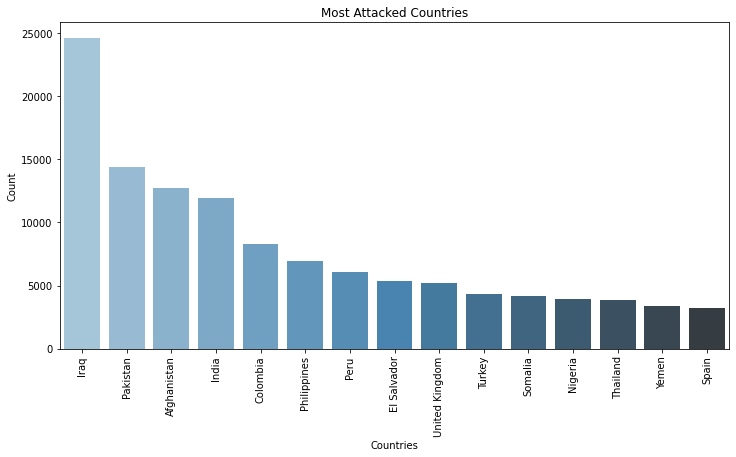

In [25]:
plt.subplots(figsize=(12,6))
sns.barplot(data['Country'].value_counts()[:15].index,data['Country'].value_counts()[:15].values,palette='Blues_d')
plt.title('Most Attacked Countries')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

### Analysing the Weapon Type

In [26]:
print(data['Weaptype'].unique())

['Unknown' 'Explosives' 'Incendiary' 'Firearms' 'Chemical' 'Melee'
 'Sabotage Equipment'
 'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)'
 'Fake Weapons' 'Radiological' 'Other' 'Biological']


In [27]:
data['Weaptype'].value_counts()

Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                                     

In [28]:
weaptype_filtered =data['Weaptype'].apply(lambda x: x if x in ['Explosives','Firearms','Unknown',
                                                               'Incendiary'] else 'Others')
weaptype = weaptype_filtered.value_counts().tolist()

In [29]:
weaptype_filtered.unique()

array(['Unknown', 'Explosives', 'Incendiary', 'Firearms', 'Others'],
      dtype=object)

In [30]:
weaptype_filtered.value_counts()

Explosives    92426
Firearms      58524
Unknown       15157
Incendiary    11135
Others         4449
Name: Weaptype, dtype: int64

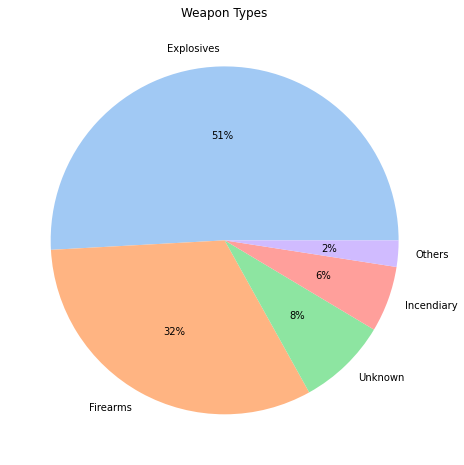

In [31]:
weap_labels = ['Explosives','Firearms','Unknown','Incendiary','Others']
colors = sns.color_palette('pastel')[0:6]

#Creating pie chart
plt.figure(figsize=(16, 8))
plt.title('Weapon Types')
plt.pie(weaptype, labels = weap_labels, colors = colors, autopct='%.0f%%')
plt.show()

### Most Targeted Countries

In [32]:
data.Natlty1.value_counts()[:15]

Iraq                24113
Pakistan            13900
India               12098
Afghanistan         10931
Colombia             7922
Philippines          6685
Peru                 5840
El Salvador          5212
United States        5065
Turkey               4636
Israel               4097
Thailand             3804
Nigeria              3759
Northern Ireland     3367
Somalia              3160
Name: Natlty1, dtype: int64

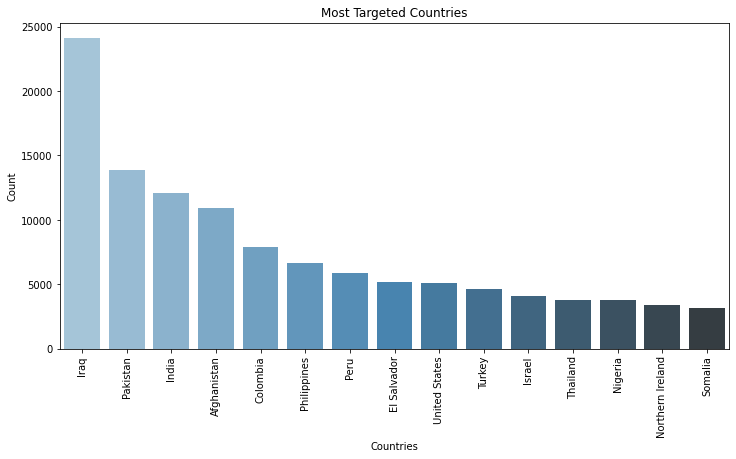

In [33]:
plt.subplots(figsize=(12,6))
sns.barplot(data['Natlty1'].value_counts()[:15].index,data['Natlty1'].value_counts()[:15].values,palette='Blues_d')
plt.title('Most Targeted Countries')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

## Analysing the people killed in Terror Attack

In [34]:
# Total Number of people killed in terror attack
killData = data.loc[:,'Nkill']
print('Number of people killed by terror attack:', int(sum(killData.dropna()))) # Drop the NaN values

Number of people killed by terror attack: 411868


### Killed w.r.t Attack Type

In [35]:
attackData = data.loc[:,'Attacktype']
typeKillData = pd.concat([attackData, killData], axis=1)

In [36]:
typeKillData.head()

,Attacktype,Nkill
0,Assassination,1
1,Hostage Taking (Kidnapping),0
2,Assassination,1
3,Bombing/Explosion,0
4,Facility/Infrastructure Attack,0


In [37]:
#Number of people killed in different type of Attack
typeKillFormatData = typeKillData.pivot_table(columns='Attacktype', values='Nkill', aggfunc='sum')
typeKillFormatData

Attacktype,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
Nkill,160297,24920,157321,3642,3718,4478,24231,880,32381


### Killed w.r.t Countries

In [38]:
countryData = data.loc[:,'Country']
countryKillData = pd.concat([countryData, killData], axis=1)

In [39]:
countryKillFormatData = countryKillData.pivot_table(columns='Country', values='Nkill', aggfunc='sum')
countryKillFormatData

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
Nkill,39384,42,11066,0,3043,0,490,37,23,30,...,1,0,1500,97,1,8776,119,324,70,154


# Conclusion

### Terrorist mostly uses Bombing/Explosion to attack
### Terrorist mostly uses Explosives as a weapon
### Iraq, Pakistan, Afghanistan, India, Colombia these are top 5 with most Terrorist attack
### Similarly above 5 countries are the most targeted countries
### Terrorist killed people mainly with Armed Assault and Bombing/Explosion
### People killed in Iraq and Afgahanistan Terrorist Attack are very high as compared to other countries